In [ ]:
import pandas as pd
import math
import numpy as np

In [ ]:
# Đọc dữ liệu
df_list = []



for i in range(101):
    df_list.append(pd.read_csv(f"./data_2/data_2/ha_noi/page_nha_dat_ha-noi_{i}.csv"))

# for i in range(10):
#     df_list.append(pd.read_csv(f"./data/page_tp-ho-chi-minh_{i}.csv"))

# for i in range(3):
#     df_list.append(pd.read_csv(f"./data/page_da-nang_{i}.csv"))

# for i in range(2):
#     df_list.append(pd.read_csv(f"./data/page_nha_dat_da-nang_{i}.csv"))
    
# for i in range(3):
#     df_list.append(pd.read_csv(f"./data/page_nha_dat_ha-noi_{i}.csv"))

# for i in range(4):
#     df_list.append(pd.read_csv(f"./data/page_nha_dat_tp-ho-chi-minh_{i}.csv"))

df = pd.concat(df_list, ignore_index=True)


# Quy chuẩn lại tên cột


df.columns = [
    "Area",  # Diện tích đất
    "Bedroom",  # Phòng ngủ
    "Bathroom",  # Phòng vệ sinh
    "Paper",  # Các loại giấy tờ pháp lý
    "Type",  # Loại hình nhà ở
    "Width",  # Chiều rộng
    "UseageArea",  # Diện tích sử dụng
    "Price/m2",  # Giá 1m2
    "MainDirection",  # Hướng của chính
    "Floor",  # Tổng số tầng
    "Charistic",  # Đặc điểm nhà đất
    "Furniture",  # Tình hình nội thất
    "Length",  # Chiều dài
    "Location",  # Vị trí địa lý
    "Name",
    "Url",
    "District",
    "Price",
]


df.count()

# df["đ/m²" in df["Price/m2"]]

C:\Users\Acer\AppData\Local\Temp\ipykernel_1564\4018182541.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(df_list, ignore_index=True)


Area             9800
Bedroom          9800
Bathroom         6315
Paper            7832
Type             9700
Width            1452
UseageArea       1204
Price/m2         9800
MainDirection    1290
Floor            7456
Charistic         634
Furniture        4986
Length            284
Location         9804
Name             9804
Url                 0
District         9804
Price            9804
dtype: int64

In [ ]:
df[df["Price/m2"].isnull()]

,Area,Bedroom,Bathroom,Paper,Type,Width,UseageArea,Price/m2,MainDirection,Floor,Charistic,Furniture,Length,Location,Name,Url,District,Price
1588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ha-noi,"Bán nhà ngõ 296 Lĩnh Nam: 27m2, 2 tầng, giá ch...",NaN,"296 Lĩnh Nam, Phường Lĩnh Nam, Quận Hoàng Mai,...","1,89 tỷ - 27 m2"
3366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ha-noi,Bán Gấp Nhà Hồ Tùng Mậu 60m2 - Hơn 10tỷ - Lô G...,NaN,"Đường Hồ Tùng Mậu, Phường Phú Diễn, Quận Bắc T...","10,9 tỷ - 60 m2"
3378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ha-noi,Nhà độc lập 40m2 xây dựng 3 tầng giá chỉ 1.85 ...,NaN,"Đại Thành , Đông La, Phường Yên Nghĩa, Quận Hà...","1,85 tỷ - 40 m2"
3385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ha-noi,Ở NGAY! Nhà dân xây Xuân Phương 59m chỉ 4.x tỷ...,NaN,"Đường Phương Canh, Phường Phương Canh, Quận Na...","4,79 tỷ - 59 m2"


In [ ]:
# Xóa cột thừa ( Chiều dài - thiếu dữ liệu, Chiều rộng - thiếu dữ liệu, Name+URL - không quan trọng, Price -> Thừa )

df.drop(
    columns=[
        "Name",  # khong quan trong
        "Url",  # khong lien quan
        "Price",  # ko su dung vi su dung price/m2
    ],
    inplace=True,
)
df.dropna(subset=["Price/m2"], inplace=True)
df.dropna(subset=["Area"], inplace=True)

df.count()

Area             9800
Bedroom          9800
Bathroom         6315
Paper            7832
Type             9700
Width            1452
UseageArea       1204
Price/m2         9800
MainDirection    1290
Floor            7456
Charistic         634
Furniture        4986
Length            284
Location         9800
District         9800
dtype: int64

In [ ]:
df.drop(
    columns=[
        "UseageArea",  
        "Charistic",
        "Length", 
        "Width",
        "MainDirection"
    ],
    inplace=True,
)
df.count()

Area         9800
Bedroom      9800
Bathroom     6315
Paper        7832
Type         9700
Price/m2     9800
Floor        7456
Furniture    4986
Location     9800
District     9800
dtype: int64

In [ ]:
def remove_last_text(text):
    result = ""
    if type(text) == str:
        list_char = text.split(" ")
        list_char.pop()
        result = " ".join(list_char)
    elif type(text) == float:
        result = math.nan
    return result


def list_value_field(field):
    return list(dict.fromkeys(df[field].values.tolist()))


def getConvertterNum(field, key):
    value = ""
    if isinstance(field, (int, float)):
        if math.isnan(field):
            value = "NaN"
        else:
            return field
    elif isinstance(field, (str)):
        if field.isnumeric() and field != "NaN":
            return float(field)
        else:
            value = field.lower()
    return convertter[key][value]



#  "District": {
#         "quận hà đông": 1,
#         "quận ba đình": ,
#         "quận cầu giấy": ,
#         "quận đống đa",
#         "huyện gia lâm",
#         "quận thanh xuân",
#         "quận tây hồ",
#         "quận hoàng mai",
#         "quận long biên",
#         "quận nam từ liêm",
#         "quận hai bà trưng",
#         "quận bắc từ liêm",
#         "huyện hoài đức",
#         "quận hoàn kiếm",
#         "huyện thanh trì",
#         "huyện đông anh",
#         "thành phố thủ đức",
#         "quận tân phú",
#         "quận bình thạnh",
#         "quận bình tân",
#         "huyện hóc môn",
#         "quận 12",
#         "quận tân bình",
#         "quận 4",
#         "quận 10",
#         "huyện nhà bè",
#         "quận 6",
#         "quận 7",
#         "quận 1",
#         "quận 3",
#         "quận gò vấp",
#         "huyện củ chi",
#         "quận 11",
#         "quận 8",
#         "huyện bình chánh",
#         "quận phú nhuận",
#         "quận 5",
#         "quận thanh khê",
#         "quận sơn trà",
#         "quận hải châu",
#         "huyện hòa vang",
#         "quận cẩm lệ",
#         "quận liên chiểu",
#         "quận ngũ hành sơn",
#     },

convertter = {
    "Funiture": {
        "nội thất đầy đủ": 4,
        "nội thất cao cấp": 5,
        "nhà trống": 0,
        "bàn giao thô": 2,
        "NaN": 0,
    },
    "Paper": {"đã có sổ": 3, "đang chờ sổ": 2, "giấy tờ khác": 1, "NaN": 0},
    "Type": {
        "nhà biệt thự": 3,
        "nhà phố liền kề": 2,
        "nhà mặt phố, mặt tiền": 2,
        "nhà ngõ, hẻm": 1,
        "NaN": 0,
    },
    "Bathroom": {"nhiều hơn 6": 7, "NaN": 0},
    "Bedroom": {
        "NaN": 1,
        "nhiều hơn 10": 11,
    },
    "MainDirection": {
        "NaN": 0,
        "đông nam": 1,
        "nam": 2,
        "bắc": 3,
        "tây bắc": 4,
        "tây": 5,
        "đông": 6,
        "đông bắc": 7,
        "tây nam": 8,
    },
    "Floor": {"NaN": 0},
    "Charistic": {"hẻm xe hơi": 1, "NaN": 0},
}

# list_disctric = []


# for district in np.array(a):
#     if district.lower() not in list_disctric:
#         list_disctric.append(district.lower())

# list_disctric

In [ ]:
# Xử lý dữ liệu phòng ngủ

# Kiểm tra những dữ liệu của phòng tắm
# bedroom = list(dict.fromkeys(df["Bedroom"].values.tolist()))


df["Bedroom"] = (
    df["Bedroom"]
    .apply(remove_last_text)
    .apply(getConvertterNum, args=("Bedroom",))
    .apply(lambda x: float(x))
)

list_value_field("Bedroom")


[10.0, 3.0, 1.0, 4.0, 5.0, 6.0, 9.0, 2.0, 11.0, 8.0, 7.0]

In [ ]:
# Xử lý phần giá cả

# list_value_field("Price/m2")


def convert_price(price):
    list_char = price.split(" ")
    base = list_char.pop()
    result = " ".join(list_char)
    result = float(result.replace(",", "."))
    if base == "tỷ/m²":
        result = result * 1000
    return result


invalid_price = df["Price/m2"].str.contains("đ/m²")

filtered_df = df[~invalid_price]

df["Price/m2"] = filtered_df["Price/m2"].apply(convert_price)

list_value_field("Price/m2")
# df.sort_values(by=["Price/m2"])

[154.55,
 142.11,
 55.95,
 184.62,
 111.11,
 119.0,
 118.42,
 198.0,
 218.0,
 123.96,
 101.59,
 112.14,
 37.5,
 194.19,
 233.33,
 79.69,
 90.32,
 144.74,
 130.0,
 138.38,
 204.76,
 206.25,
 172.0,
 197.92,
 330.0,
 213.33,
 107.5,
 129.63,
 98.84,
 229.17,
 133.33,
 184.89,
 152.2,
 161.67,
 85.53,
 136.67,
 115.71,
 175.71,
 168.0,
 138.24,
 89.29,
 160.0,
 79.17,
 111.54,
 115.56,
 134.71,
 106.0,
 80.3,
 170.51,
 80.0,
 22.65,
 113.33,
 66.0,
 106.25,
 115.0,
 175.0,
 120.0,
 83.33,
 131.67,
 103.33,
 139.06,
 77.94,
 53.44,
 110.59,
 100.0,
 62.5,
 283.33,
 106.82,
 140.63,
 136.84,
 113.57,
 71.43,
 142.35,
 126.67,
 122.22,
 188.0,
 93.44,
 161.9,
 105.0,
 58.33,
 92.5,
 43.33,
 127.42,
 345.45,
 255.56,
 90.0,
 154.0,
 109.52,
 38.75,
 192.62,
 128.89,
 182.86,
 117.33,
 187.5,
 300.0,
 55.0,
 131.82,
 116.07,
 137.8,
 38.1,
 120.83,
 69.44,
 202.86,
 5.41,
 428.57,
 151.52,
 85.19,
 112.5,
 43.75,
 179.78,
 76.67,
 205.0,
 104.62,
 106.92,
 150.0,
 200.0,
 106.56,
 260.0,
 177.

In [ ]:
# Xử lý phần diện tích

df["Area"] = df["Area"].apply(remove_last_text).apply(lambda x: float(x))

list_value_field("Area")

[55.0,
 38.0,
 42.0,
 65.0,
 36.0,
 50.0,
 48.0,
 35.0,
 70.0,
 60.0,
 86.0,
 102.0,
 32.0,
 31.0,
 92.5,
 210.0,
 80.0,
 45.0,
 40.0,
 27.0,
 43.0,
 54.0,
 47.0,
 59.0,
 30.0,
 15.0,
 140.0,
 100.0,
 68.0,
 39.0,
 34.0,
 33.0,
 92.6998,
 20.0,
 17.0,
 22.0,
 16.0,
 14.0,
 63.0,
 30.5,
 75.0,
 44.7999,
 24.0,
 646.5,
 350.0,
 64.0,
 89.0,
 61.0,
 19.0,
 46.0,
 44.0,
 23.0,
 51.0,
 56.0,
 36.5998,
 90.0,
 71.0,
 62.0,
 35.5,
 52.0,
 21.0,
 41.0,
 25.0,
 91.0,
 37.0,
 18.0,
 120.0,
 110.0,
 58.0,
 28.0,
 44.5,
 76.0,
 35.1,
 78.0,
 49.0,
 105.0,
 77.0,
 266.0,
 92.0,
 131.0,
 74.0,
 142.0,
 180.0,
 307.0,
 53.0,
 69.0,
 103.0,
 126.0,
 72.0,
 107.0,
 190.0,
 66.0,
 84.0,
 39.0998,
 225.0,
 49.0998,
 12.0,
 128.0,
 10.0,
 127.0,
 57.0,
 64.8,
 49.5,
 99.0,
 68.6997,
 87.0,
 26.0,
 82.0,
 32.0998,
 65.6999,
 40.7,
 29.0,
 67.0,
 144.0,
 85.0,
 93.0,
 230.0,
 40.5,
 130.0,
 98.0,
 82.5,
 38.5,
 101.0,
 108.0,
 83.0,
 41.2,
 320.0,
 48.9,
 280.0,
 13.0,
 820.0,
 195.0,
 135.0,
 150.0,
 66.3,

In [ ]:
# Xử lý phần nội thất

df["Furniture"] = df["Furniture"].apply(getConvertterNum, args=("Funiture",)).apply(lambda x: float(x))

list_value_field("Furniture")

[4.0, 5.0, 0.0, 2.0]

In [ ]:
# Xử ly phần giấy tờ nhà

df["Paper"] = df["Paper"].apply(getConvertterNum, args=("Paper",)).apply(lambda x: float(x))

list_value_field("Paper")

[3.0, 0.0, 1.0, 2.0]

In [ ]:
# Xử lý phần vị trí nhà
# def remove_type_specific(type):
#     if isinstance(type, (str)):
#         real_type = type.split(",", 1)[0]
#         return real_type
#     return type
    
df["Type"] = df["Type"].apply(getConvertterNum, args=("Type",)).apply(lambda x: float(x))

list_value_field("Type")

[1.0, 2.0, 0.0, 3.0]

In [ ]:
# Xử lý phần số tầng
def remove_type_specific(type):
    if isinstance(type, (str)):
        real_type = type.split(",", 1)[0]
        return real_type
    return type


df["Floor"] = (
    df["Floor"].apply(remove_type_specific).apply(getConvertterNum, args=("Floor",))
)

list_value_field("Floor")

[5.0,
 1.0,
 6.0,
 7.0,
 4.0,
 0.0,
 3.0,
 2.0,
 66.0,
 10.0,
 8.0,
 9.0,
 25.0,
 55.0,
 44.0,
 77.0,
 27.0,
 22.0,
 11.0,
 33.0,
 88.0,
 532.0,
 24.0,
 86.0,
 34.0,
 45.0,
 99.0,
 35.0,
 17.0]

In [ ]:
# Xử lý phần phòng tắm

df["Bathroom"] = df["Bathroom"].apply(remove_last_text).apply(getConvertterNum, args=("Bathroom",))

list_value_field("Bathroom")

[0.0, 1.0, 4.0, 3.0, 5.0, 7.0, 2.0, 6.0]

In [ ]:
# Xử lý phần quận huyện
def get_district(location):
    temp_locaion = location.split(",")
    temp_locaion.pop()
    return temp_locaion.pop()


df["District"] = df["District"].apply(lambda x: x.replace("Xem bản đồ", "")).apply(get_district)

list_value_field("District")

[' Quận Cầu Giấy',
 ' Quận Hà Đông',
 ' Quận Long Biên',
 ' Quận Bắc Từ Liêm',
 ' Quận Nam Từ Liêm',
 ' Quận Ba Đình',
 ' Quận Đống Đa',
 ' Quận Tây Hồ',
 ' Huyện Thanh Trì',
 ' Quận Hai Bà Trưng',
 ' Quận Thanh Xuân',
 ' Quận Hoàng Mai',
 ' Huyện Quốc Oai',
 ' Quận Hoàn Kiếm',
 ' Huyện Ba Vì',
 ' Huyện Gia Lâm',
 ' Huyện Hoài Đức',
 ' Huyện Mê Linh',
 ' Huyện Đông Anh',
 ' Huyện Thanh Oai',
 ' Huyện Chương Mỹ',
 ' Huyện Thường Tín',
 ' Thị xã Sơn Tây',
 ' Huyện Đan Phượng',
 ' Huyện Thạch Thất',
 ' Huyện Sóc Sơn']

In [ ]:
df.head()

,Area,Bedroom,Bathroom,Paper,Type,Price/m2,Floor,Furniture,Location,District
0,55.0,10.0,0.0,3.0,1.0,154.55,5.0,4.0,ha-noi,Quận Cầu Giấy
1,38.0,3.0,0.0,3.0,2.0,142.11,5.0,5.0,ha-noi,Quận Hà Đông
2,42.0,1.0,1.0,0.0,1.0,55.95,1.0,0.0,ha-noi,Quận Long Biên
3,65.0,4.0,4.0,3.0,1.0,184.62,5.0,5.0,ha-noi,Quận Cầu Giấy
4,36.0,4.0,0.0,3.0,1.0,111.11,6.0,4.0,ha-noi,Quận Bắc Từ Liêm


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# figure = px.bar(
#     df,
#     x=df["District"],
#     y=df["Area"],
#     color=df["Price/m2"],
#     title="Rent in Different Cities According to Area Type",
#     range_y=(4000, 10000)
# )
# figure.show()

# sns.displot(df["Price/m2"], bin(20))

df.columns

df.drop(columns=["Location"], inplace=True)

In [ ]:
df.sort_values(by=["Price/m2"]).tail()

# df.dropna(subset=["Price/m2"], inplace=True)

,Area,Bedroom,Bathroom,Paper,Type,Price/m2,Floor,Furniture,District
2532,37.0,3.0,4.0,0.0,1.0,NaN,5.0,0.0,Quận Long Biên
4467,45.0,3.0,0.0,3.0,1.0,NaN,3.0,0.0,Huyện Đông Anh
8068,62.0,3.0,3.0,3.0,1.0,NaN,0.0,4.0,Huyện Đông Anh
9182,30.0,3.0,3.0,3.0,1.0,NaN,3.0,0.0,Huyện Thanh Oai
9768,66.0,2.0,0.0,3.0,1.0,NaN,0.0,0.0,Huyện Thanh Oai


In [ ]:
# plt.figure(figsize=(16, 5))

# sns.heatmap(df.corr(), annot=True)


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Bedroom'}>,
        <Axes: title={'center': 'Bathroom'}>],
       [<Axes: title={'center': 'Paper'}>,
        <Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Price/m2'}>],
       [<Axes: title={'center': 'Floor'}>,
        <Axes: title={'center': 'Furniture'}>, <Axes: >]], dtype=object)

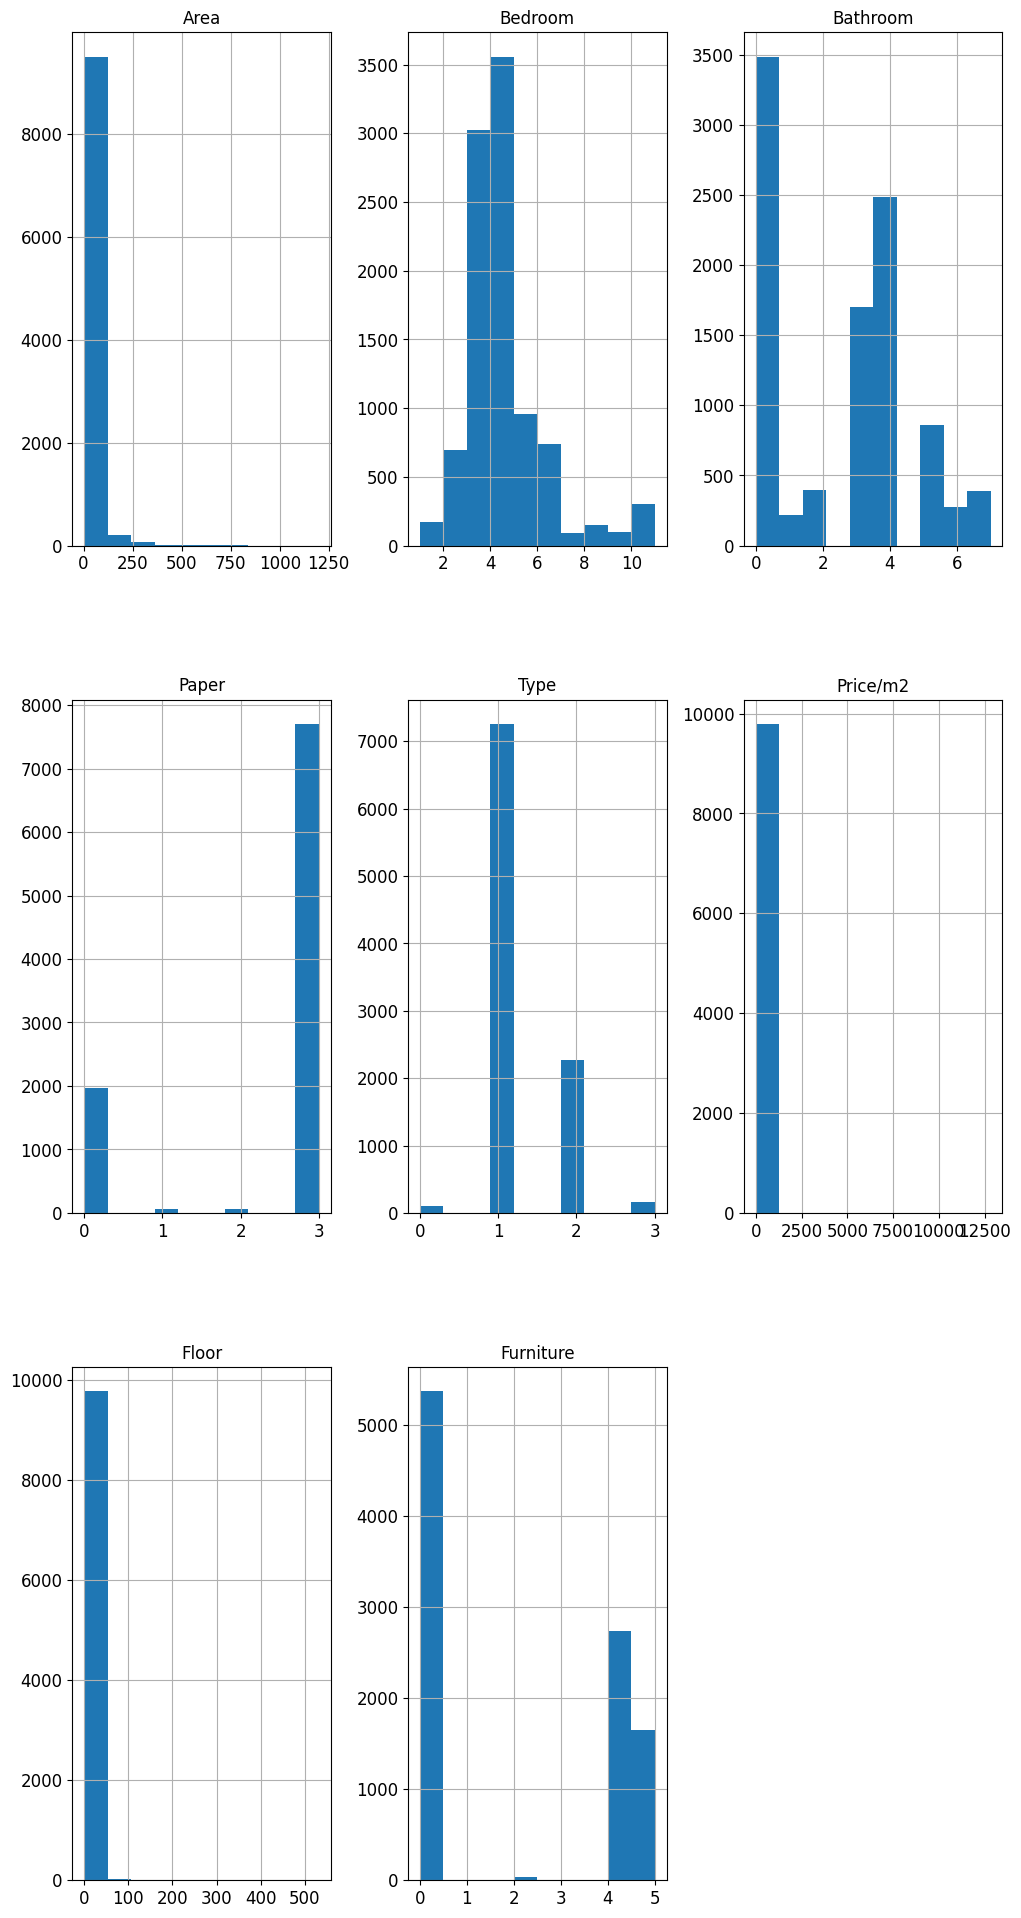

In [ ]:
df_num = df.select_dtypes(include=["float64", "int64"])


df_num.hist(figsize=(12, 24), bins=10, xlabelsize=12, ylabelsize=12)

<Axes: >

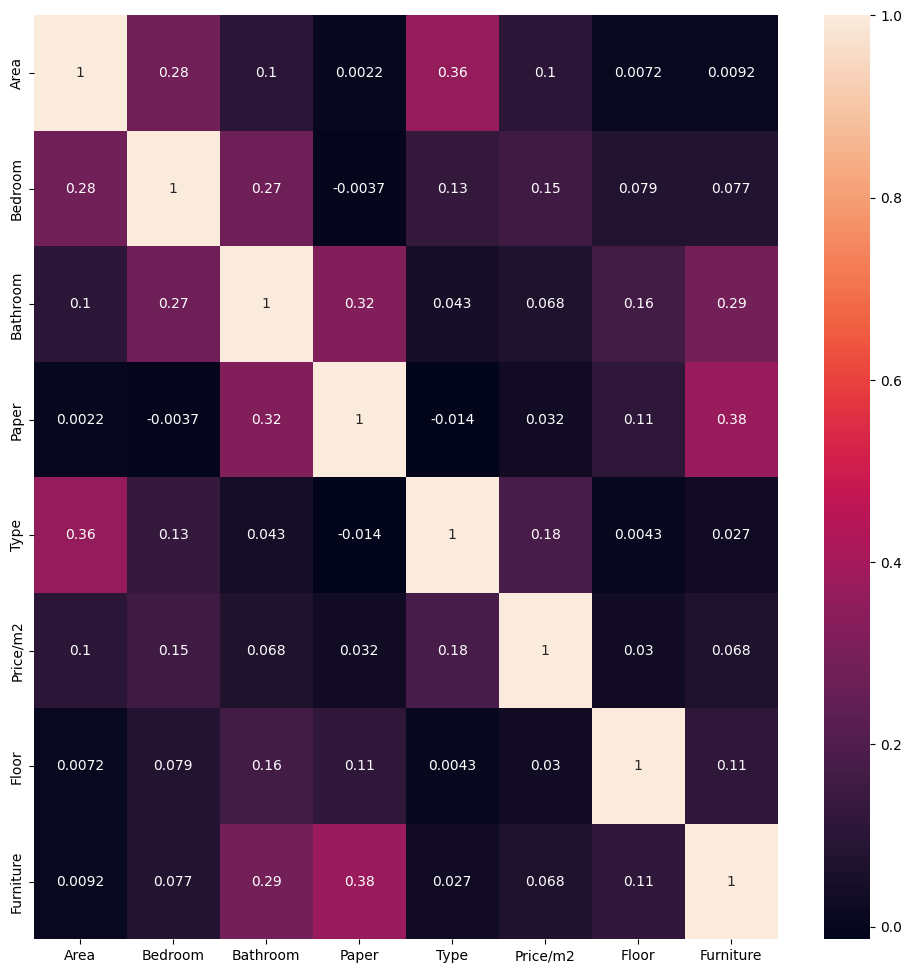

In [ ]:
df_num = df.select_dtypes(include=["float64", "int64"])
# df_num.hist(figsize=(12, 24), bins=10, xlabelsize=12, ylabelsize=12)
plt.figure(figsize=(12, 12))
sns.heatmap(df_num.corr(), annot=True)



In [ ]:
# f, (ax1, ax2) = plt.subplots(1, 2)
# f.set_figwidth(20, forward=True)

# k = df.copy()

# Q1 = df["Price/m2"].quantile(0.25)
# Q3 = df["Price/m2"].quantile(0.75)
# IQR = Q3 - Q1
# k = k[(k["Price/m2"] > (Q1 - 1.5 * IQR)) & (k["Price/m2"] < (Q3 + 1.5 * IQR))]

# ax1.scatter(y=k["Price/m2"], x=k["Area"])
# ax2.scatter(y=k["Price/m2"], x=k["District"])

# plt.show()
# có độ tương quan

C:\Users\Acer\AppData\Local\Temp\ipykernel_1564\2536851423.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price/m2"], color="g", hist_kws={"alpha": 0.4})


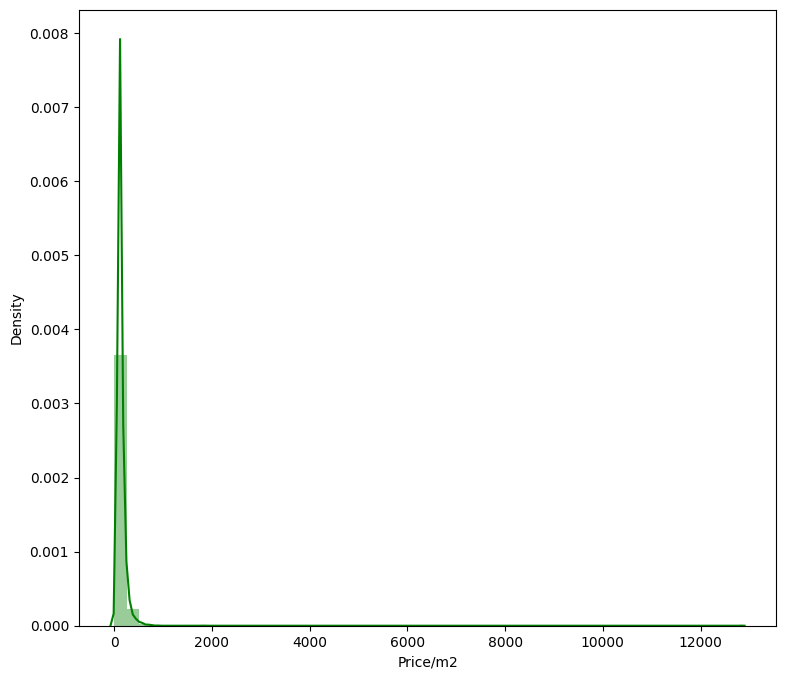

In [ ]:
plt.figure(figsize=(9, 8))
sns.distplot(df["Price/m2"], color="g", hist_kws={"alpha": 0.4})

plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_1564\1581070014.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp, color="g", hist_kws={"alpha": 0.4})


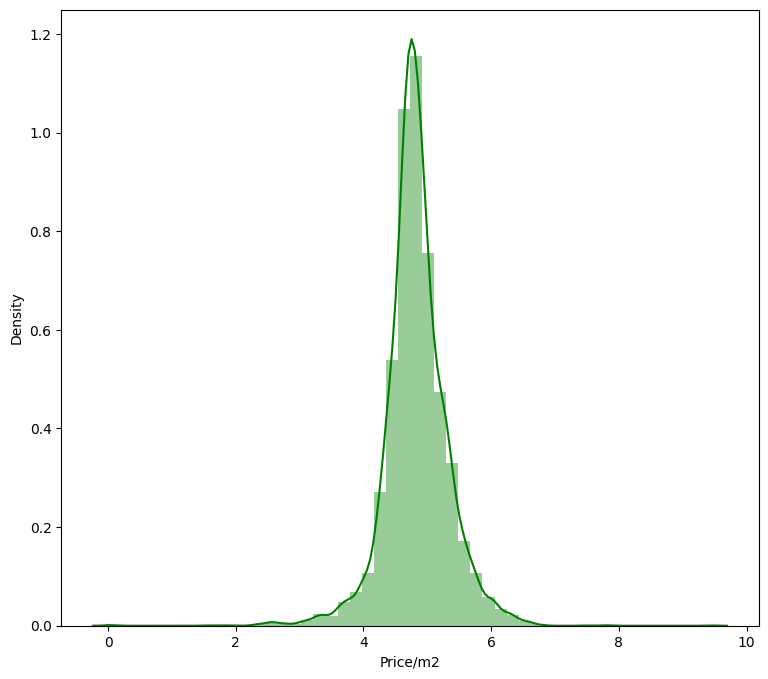

In [ ]:
# convert lai phan gia ca
import math

temp = df["Price/m2"].apply(lambda x: math.log(x))


plt.figure(figsize=(9, 8))
sns.distplot(temp, color="g", hist_kws={"alpha": 0.4})

plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_1564\2360018363.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Area"], color="g", hist_kws={"alpha": 0.4})


<Axes: xlabel='Area', ylabel='Density'>

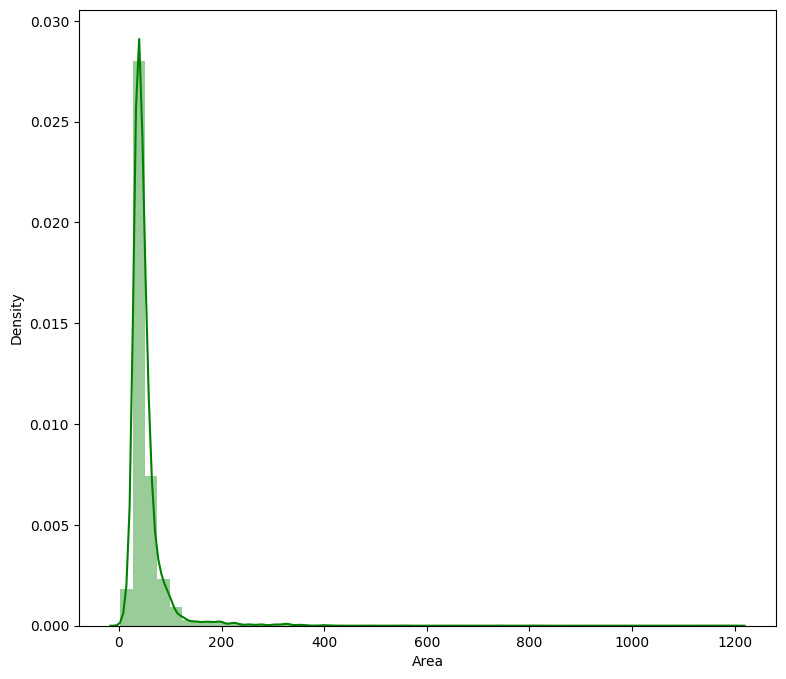

In [ ]:
plt.figure(figsize=(9, 8))
sns.distplot(df["Area"], color="g", hist_kws={"alpha": 0.4})

C:\Users\Acer\AppData\Local\Temp\ipykernel_1564\1506067740.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp_area, color="g", hist_kws={"alpha": 0.4})


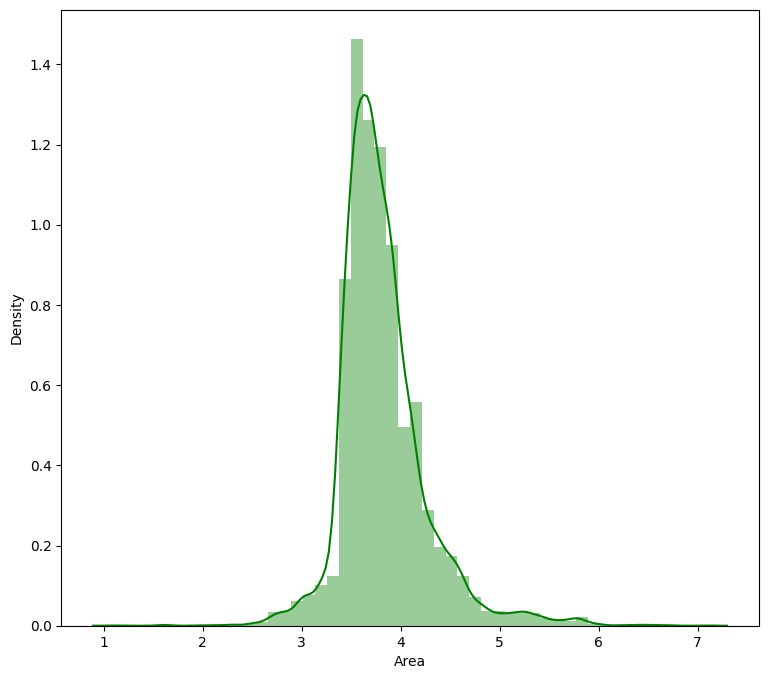

In [ ]:
import math

temp_area = df["Area"].apply(lambda x: math.log(x))


plt.figure(figsize=(9, 8))
sns.distplot(temp_area, color="g", hist_kws={"alpha": 0.4})

plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_1564\18020573.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Bedroom"], color="g", hist_kws={"alpha": 0.4})


<Axes: xlabel='Bedroom', ylabel='Density'>

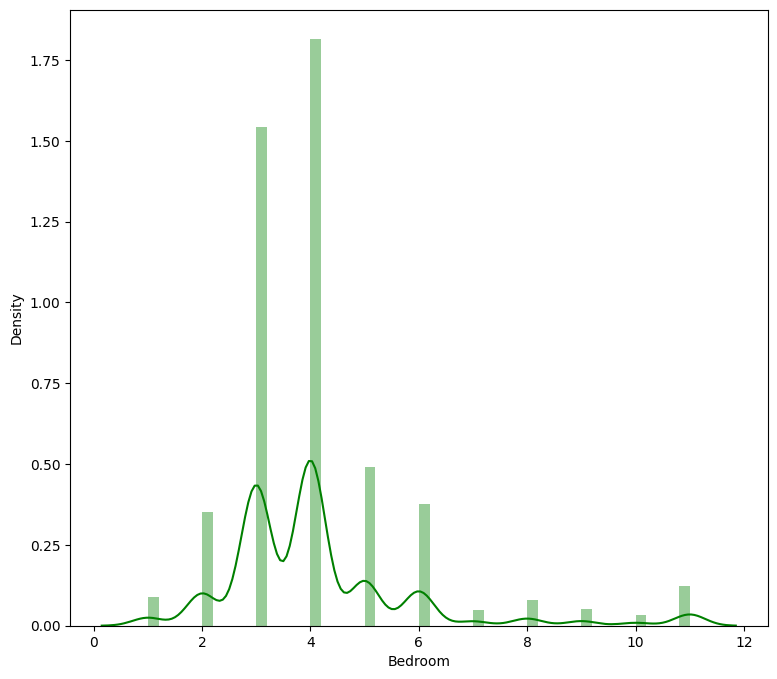

In [ ]:
plt.figure(figsize=(9, 8))
sns.distplot(df["Bedroom"], color="g", hist_kws={"alpha": 0.4})

In [ ]:
df.dropna(subset=["Price/m2"], inplace=True)

In [ ]:
df.isnull().sum()

Area         0
Bedroom      0
Bathroom     0
Paper        0
Type         0
Price/m2     0
Floor        0
Furniture    0
District     0
dtype: int64

In [ ]:
df.columns

Index(['Area', 'Bedroom', 'Bathroom', 'Paper', 'Type', 'Price/m2', 'Floor',
       'Furniture', 'District'],
      dtype='object')

In [ ]:
df["Area"] = df["Area"].apply(lambda x: math.log(x))
df["Price/m2"] = df["Price/m2"].apply(lambda x: math.log(x))

<Axes: >

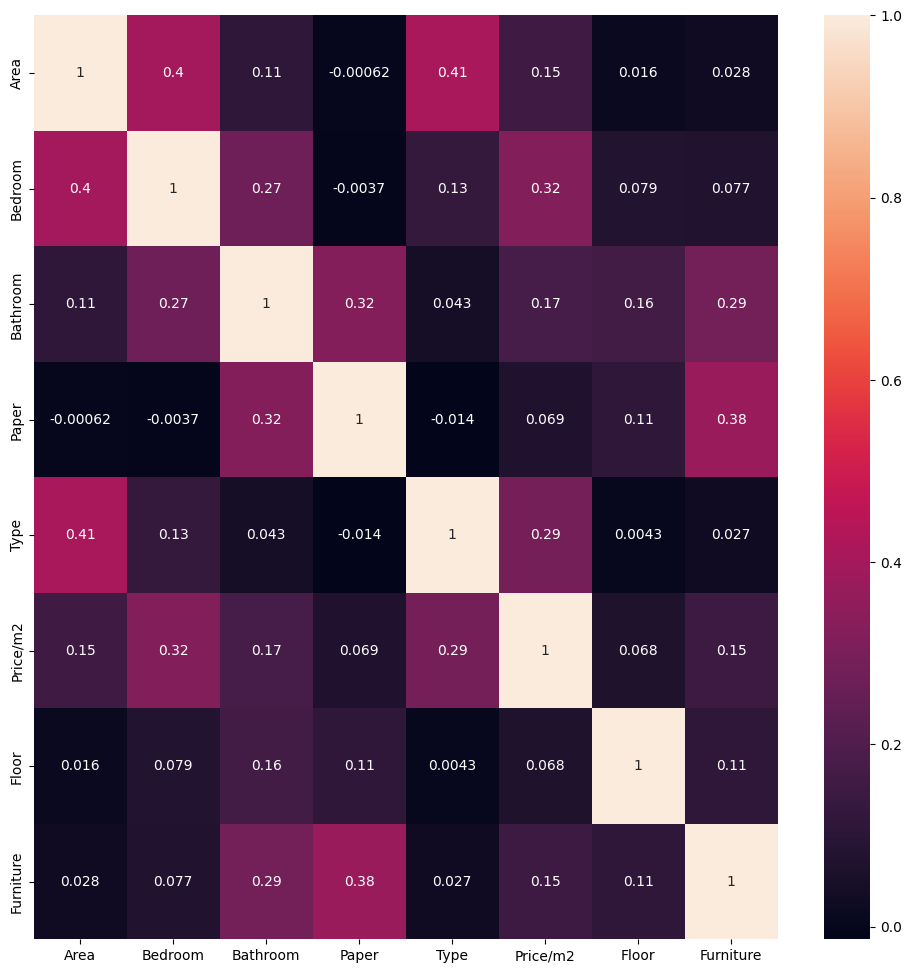

In [ ]:
df_num = df.select_dtypes(include=["float64", "int64"])
# df_num.hist(figsize=(12, 24), bins=10, xlabelsize=12, ylabelsize=12)
plt.figure(figsize=(12, 12))
sns.heatmap(df_num.corr(), annot=True)

In [ ]:
# df.dropna(subset=["Area"], inplace=True)df

<Axes: >

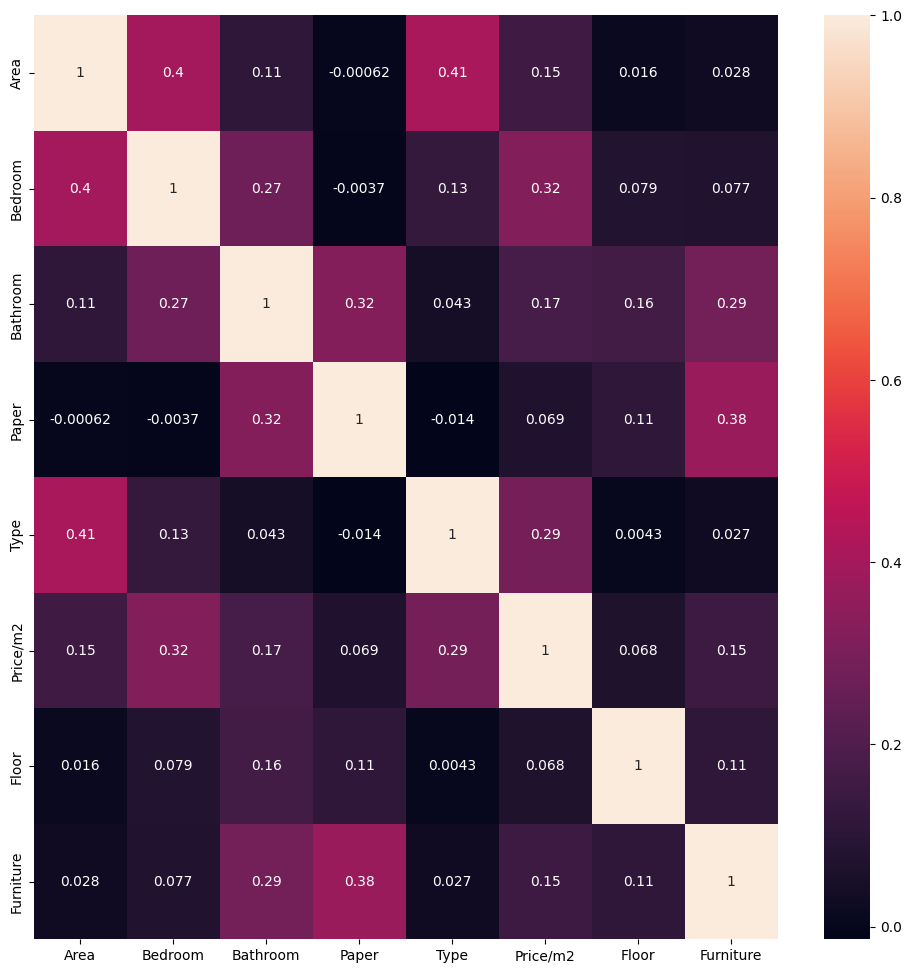

In [ ]:
df_num = df.select_dtypes(include=["float64", "int64"])
# df_num.hist(figsize=(12, 24), bins=10, xlabelsize=12, ylabelsize=12)
plt.figure(figsize=(12, 12))
sns.heatmap(df_num.corr(), annot=True)

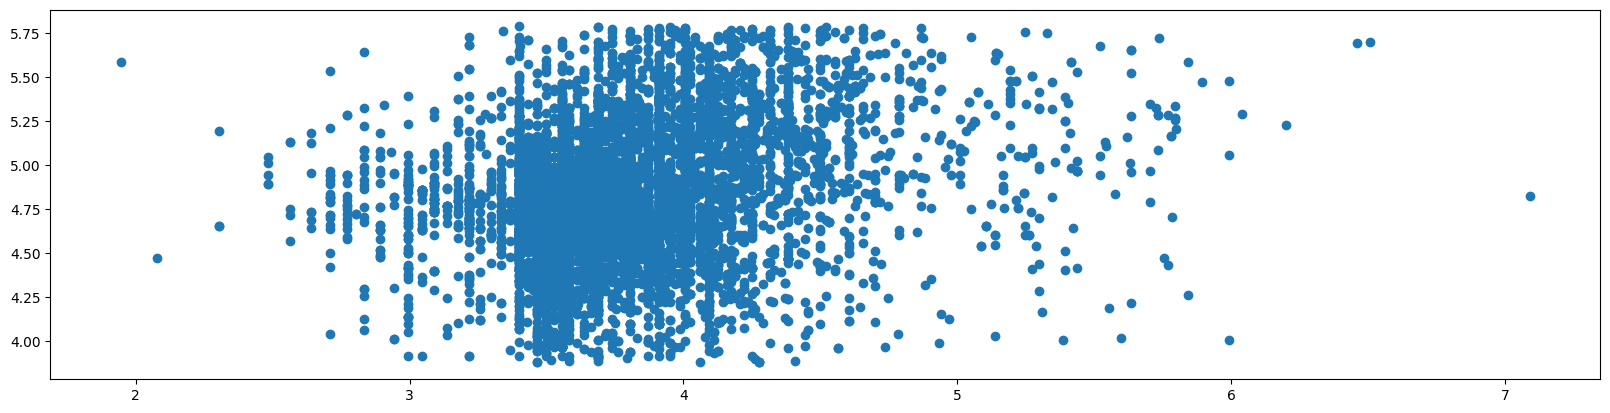

In [ ]:
f, (ax1) = plt.subplots(1)
f.set_figwidth(20, forward=True)

k = df.copy()

Q1 = df["Price/m2"].quantile(0.25)
Q3 = df["Price/m2"].quantile(0.75)
IQR = Q3 - Q1
k = k[(k["Price/m2"] > (Q1 - 1.5 * IQR)) & (k["Price/m2"] < (Q3 + 1.5 * IQR))]

ax1.scatter(y=k["Price/m2"], x=k["Area"])

plt.show()

<Axes: xlabel='Paper', ylabel='Price/m2'>

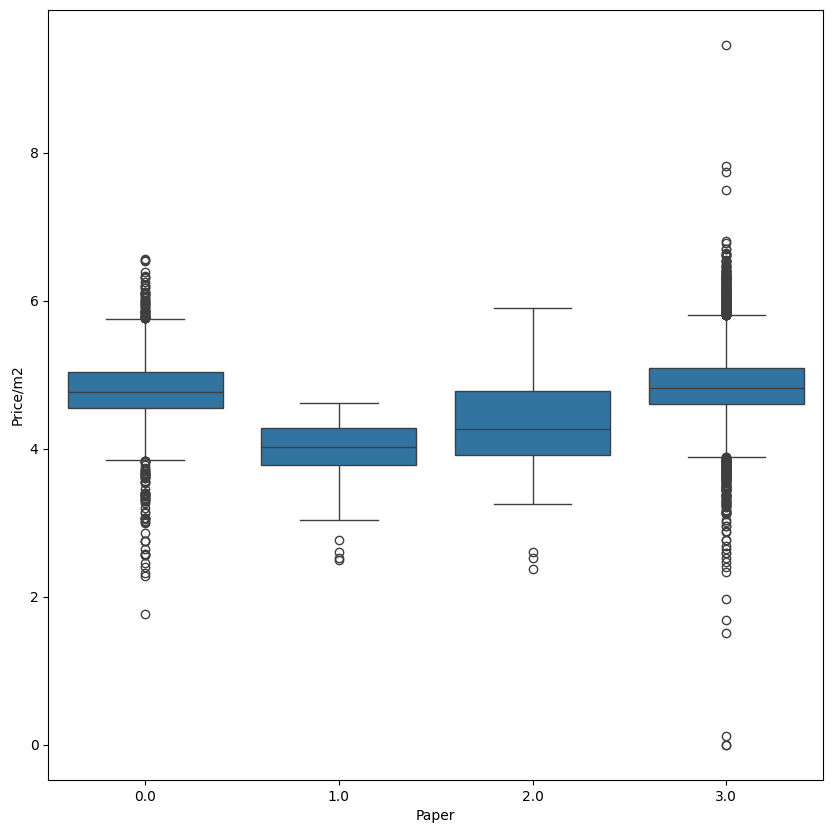

In [ ]:
plt.figure(figsize=(10, 10))
k = df[["Price/m2", "Paper"]]


# k = k[(k['Price']> (Q1_Price-1.5*IQR_Price)) & (k['Price']<(Q3_Price+1.5*IQR_Price))]
sns.boxplot(data=k[["Price/m2", "Paper"]], x="Paper", y="Price/m2")

<Axes: xlabel='Floor', ylabel='Price/m2'>

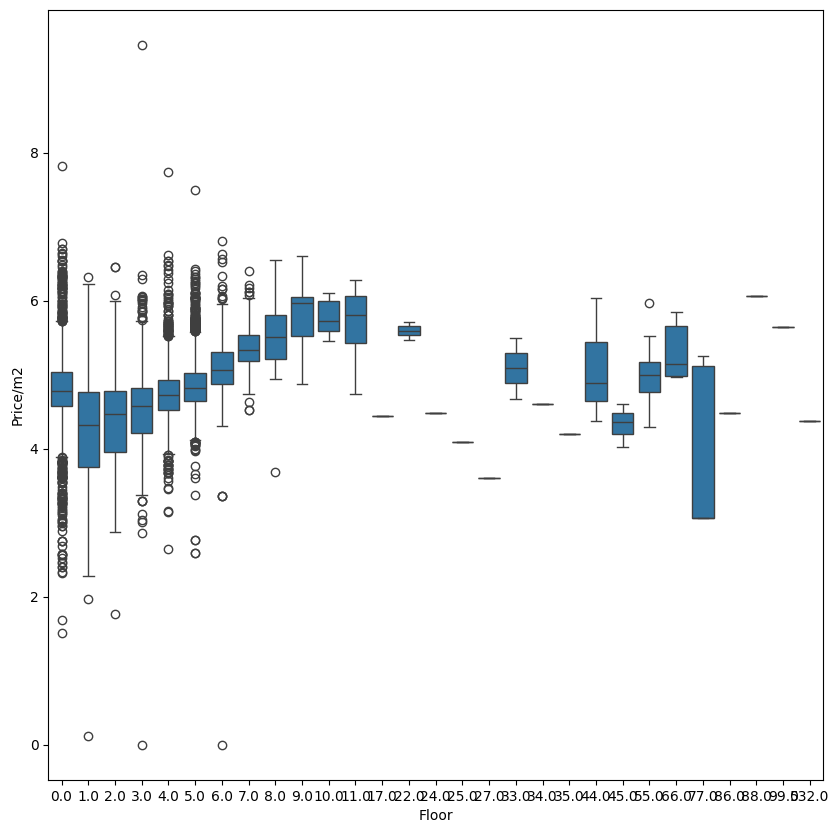

In [ ]:
plt.figure(figsize=(10, 10))
k = df[["Price/m2", "Floor"]]


# k = k[(k['Price']> (Q1_Price-1.5*IQR_Price)) & (k['Price']<(Q3_Price+1.5*IQR_Price))]
sns.boxplot(data=k[["Price/m2", "Floor"]], x="Floor", y="Price/m2")

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

df.drop(columns="District")
df_final = df[~df["Price/m2"].isna()]
X = df_final.drop(["Price/m2"], axis=1)
Y = df_final["Price/m2"]
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0
)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error


model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(10 ** mean_absolute_percentage_error(Y_valid, Y_pred))

ValueError: could not convert string to float: ' Quận Tây Hồ'

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train, Y_train)
Y_pred = model_SVR.predict(X_valid)

print(10 ** mean_absolute_percentage_error(Y_valid, Y_pred))

ValueError: could not convert string to float: ' Quận Tây Hồ'